In [5]:
from data_clean import *
from error_detect import *

#  写入你的数据库路径

In [8]:
file_path = r"D:\Jilin_university\Harbin_bridge_pro\原始数据-按月\原始数据-按月\2022-01.csv" #导入数据库路径

In [7]:
dl = ds_load(file_path) #加载数据库

# 按时间顺序排序

In [10]:
dl.sort_by_time_order()

# 将索力数据存入字典当中

In [12]:
dl.df2dict_SLData(0)
# dl.df2dict_SLData(1)

In [14]:
SLdata_list = dl.SLData_dict["SLS03"]

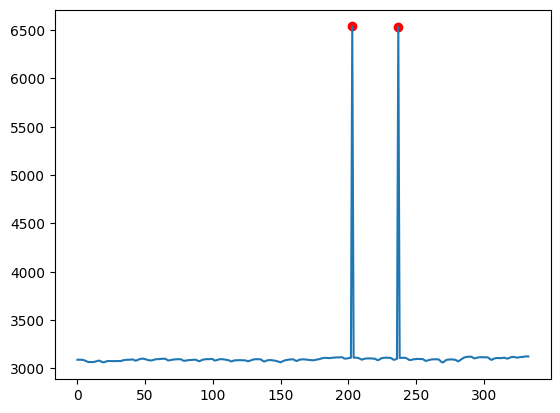

In [16]:
bp = box_plot()
error_index_list1 = bp.box_plot_train(SLdata_list)
# print(error_index_list1)
dl.detect_error_pic(SLdata_list, error_index_list1)

In [28]:
df = dl.ds[["MDATE"]]

In [36]:
index_list = dl.get_SLdata_index("SLS03") 
time_list = []
for index in index_list:
    time_list.append(df.iloc[index, 0])
time_list

[Timestamp('2022-01-01 00:41:30'),
 Timestamp('2022-01-01 02:41:30'),
 Timestamp('2022-01-01 04:41:30'),
 Timestamp('2022-01-01 06:41:37'),
 Timestamp('2022-01-01 08:41:36'),
 Timestamp('2022-01-01 10:41:40'),
 Timestamp('2022-01-01 12:41:43'),
 Timestamp('2022-01-01 14:41:41'),
 Timestamp('2022-01-01 16:41:54'),
 Timestamp('2022-01-01 18:41:37'),
 Timestamp('2022-01-01 20:41:40'),
 Timestamp('2022-01-01 22:41:41'),
 Timestamp('2022-01-02 00:41:34'),
 Timestamp('2022-01-02 02:41:44'),
 Timestamp('2022-01-02 04:41:42'),
 Timestamp('2022-01-02 06:41:42'),
 Timestamp('2022-01-02 08:41:54'),
 Timestamp('2022-01-02 10:41:45'),
 Timestamp('2022-01-02 12:41:46'),
 Timestamp('2022-01-02 14:41:43'),
 Timestamp('2022-01-02 16:41:42'),
 Timestamp('2022-01-02 18:41:33'),
 Timestamp('2022-01-02 20:41:44'),
 Timestamp('2022-01-02 22:41:41'),
 Timestamp('2022-01-03 00:41:49'),
 Timestamp('2022-01-03 02:41:53'),
 Timestamp('2022-01-03 04:41:47'),
 Timestamp('2022-01-03 06:41:55'),
 Timestamp('2022-01-

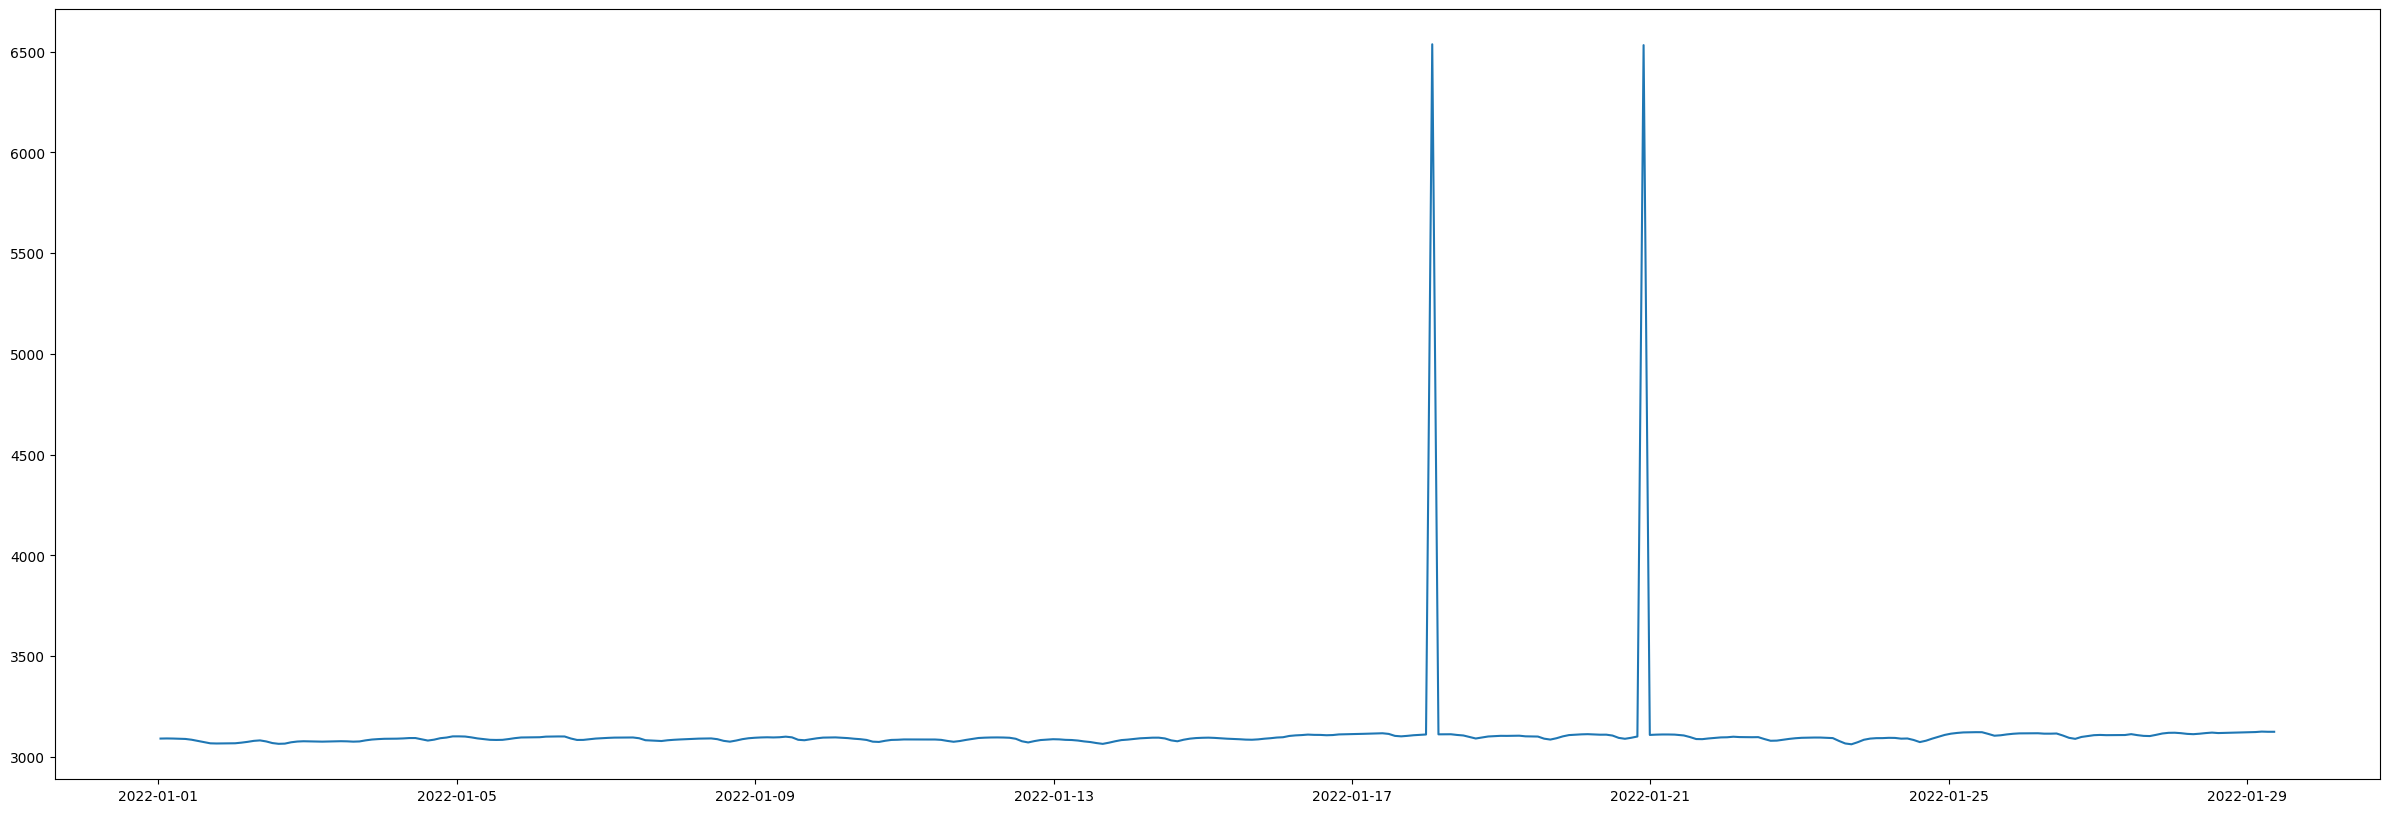

<Figure size 960x9920 with 0 Axes>

In [51]:
plt.plot(time_list, SLdata_list)
plt.figure(figsize=(12, 124), dpi = 80)
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()